Problem Statement¶
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
data_train = pd.read_csv(r"F:\anaconda\EDA\black_friday\black_friday\blackFriday_train.csv")
data_test = pd.read_csv(r"F:\anaconda\EDA\black_friday\black_friday\blackFriday_test.csv")

In [3]:
data_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [4]:
data_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [5]:
data_train["source"] = "train"
data_test["source"] = "test"

In [6]:
data = pd.concat([data_train, data_test], axis=0, ignore_index=True)

In [7]:
print(data.shape)
data.head(2)

(783667, 13)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train


In [8]:
data.tail(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test
783666,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN,test


In [9]:
data.drop("User_ID", axis = 1, inplace=True)

In [10]:
data.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
source                         object
dtype: object

In [11]:
data.nunique()

Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
source                            2
dtype: int64

In [12]:
import missingno as msno

<AxesSubplot:>

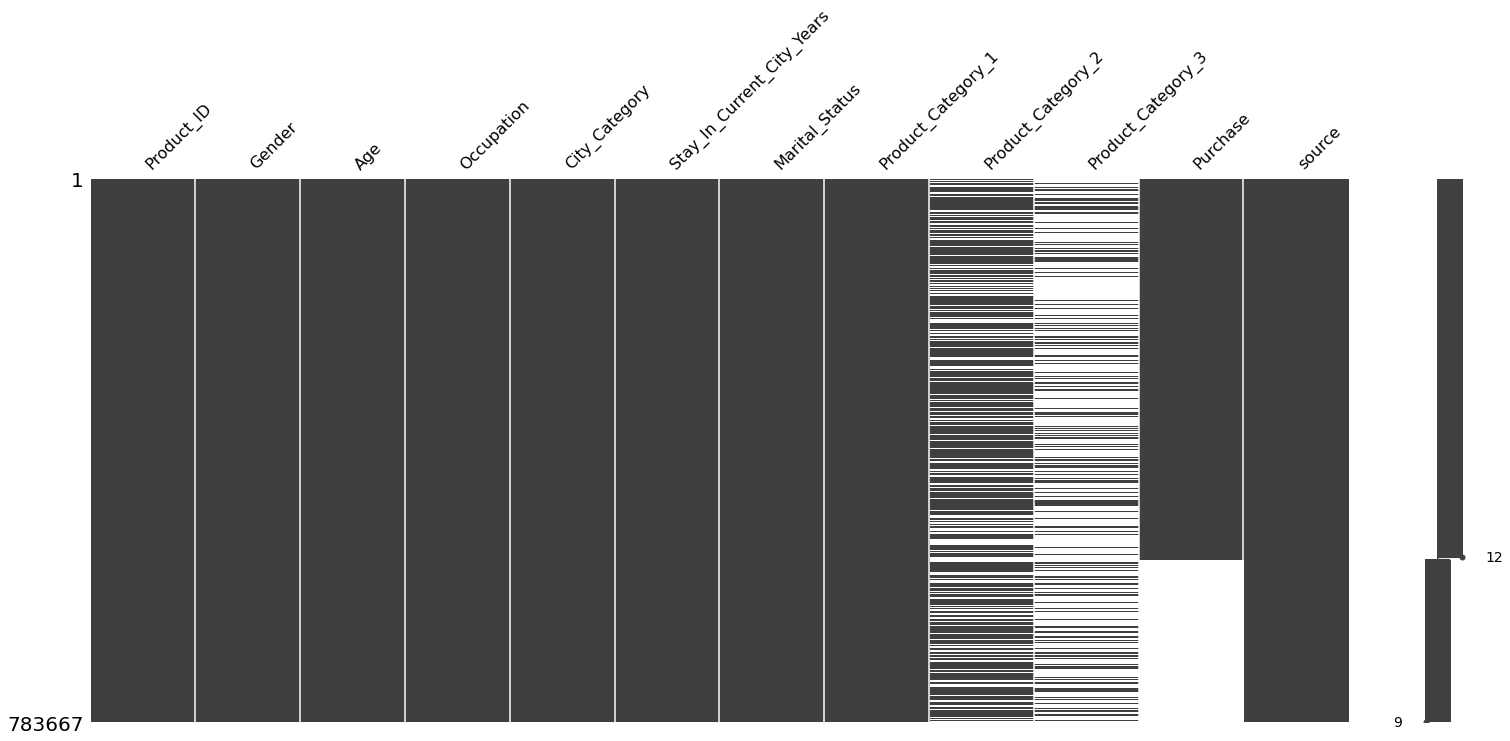

In [13]:
msno.matrix(data)

In [14]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [15]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [16]:
data.Gender.replace("M",1, inplace = True)
data.Gender.replace("F",0, inplace = True)

In [17]:
data.Gender.unique()

array([0, 1], dtype=int64)

In [18]:
data.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,train


In [19]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
data.Age = data.Age.map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [21]:
data.Age.unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [22]:
data.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [23]:
dummy = pd.get_dummies(data.City_Category, drop_first=True)

In [24]:
data = pd.concat([data,dummy], axis = 1)
data.drop("City_Category", axis = 1, inplace = True)
data.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,train,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,train,0,0


In [25]:
data.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [26]:
data.Stay_In_Current_City_Years.replace("4+", 4, inplace = True)

In [27]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source', 'B',
       'C'],
      dtype='object')

In [28]:
data.rename(columns={'Product_Category_1':"cat1", 'Product_Category_2':"cat2",
       'Product_Category_3':"cat3"}, inplace = True)

In [29]:
data.cat2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
data.cat3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [31]:
data.cat2.replace("nan", 0, inplace = True)
data.cat3.replace("nan", 0, inplace = True)

In [32]:
data.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
source                         object
B                               uint8
C                               uint8
dtype: object

In [33]:
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.astype(int)
data.B = data.B.astype(int)
data.C = data.C.astype(int)

In [34]:
data.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
source                         object
B                               int32
C                               int32
dtype: object

In [35]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,source,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,train,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,train,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,train,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,train,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,train,0,1


In [36]:
data = data.drop("Product_ID", axis = 1)

In [37]:
train_data = data[data.source == 'train']
train_data.drop("source",axis = 1, inplace = True)
train_data.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


In [38]:
test_data = data[data.source == 'test']
test_data.drop(["Purchase", "source"],axis = 1, inplace = True)
test_data.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,B,C
550068,1,5,7,2,1,1,11.0,NaN,1,0
550069,1,3,17,0,0,3,5.0,NaN,0,1


In [39]:
X = train_data.drop("Purchase", axis = 1)
y = train_data.Purchase

unseen_data = test_data.copy()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [43]:
ir = IterativeImputer()

In [44]:
ir_xtrain = pd.DataFrame(ir.fit_transform(X_train))
ir_xtest = pd.DataFrame(ir.fit_transform(X_test))
ir_unseen = pd.DataFrame(ir.transform(unseen_data))

features.cat2 = data.cat2.fillna(data.cat2.mode()[0])
features.cat3 = data.cat3.fillna(data.cat3.mode()[0])

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [46]:
xtrain_scaled = sc.fit_transform(ir_xtrain)
xtest_scaled = sc.fit_transform(ir_xtest)
unseen_data_scaled = sc.transform(ir_unseen)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [49]:
rfg = RandomForestRegressor(random_state= 0)
xgb = XGBRegressor(random_state= 0)
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state= 0)

In [52]:
rfg.fit(xtrain_scaled, y_train)
xgb.fit(xtrain_scaled, y_train)
lr.fit(xtrain_scaled, y_train)
dt.fit(xtrain_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [55]:
print('random forest')
print("What is the Training Accuracy")
print(rfg.score(xtrain_scaled,y_train))
print("What is the Training Accuracy")
print(rfg.score(xtest_scaled,y_test))
print('\n')

print('xgboost')
print("What is the Training Accuracy")
print(xgb.score(xtrain_scaled,y_train))
print("What is the Training Accuracy")
print(xgb.score(xtest_scaled,y_test))
print('\n')

print('linear regression')
print("What is the Training Accuracy")
print(lr.score(xtrain_scaled,y_train))
print("What is the Training Accuracy")
print(lr.score(xtest_scaled,y_test))
print('\n')

print('decision tree')
print("What is the Training Accuracy")
print(dt.score(xtrain_scaled,y_train))
print("What is the Training Accuracy")
print(dt.score(xtest_scaled,y_test))

random forest
What is the Training Accuracy
0.7839620963741193
What is the Training Accuracy
0.6198089748735962


xgboost
What is the Training Accuracy
0.679718880807499
What is the Training Accuracy
0.6653691592523647


linear regression
What is the Training Accuracy
0.1257761514324739
What is the Training Accuracy
0.12536925753648254


decision tree
What is the Training Accuracy
0.8026586623261506
What is the Training Accuracy
0.48554012450827344


We are getting highest test accuracy in random forest

In [59]:
from sklearn.model_selection import cross_val_score

In [63]:
cross_cv = cross_val_score(rfg, xtest_scaled, y_test, cv = 10)

In [64]:
cross_cv.mean()

0.5872862226165805

### hyper parameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
rfg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [89]:
grid_param = {
             "n_estimators" : [10,20,30],
             "max_features" : ["auto", "sqrt", 'log2', None]}

In [90]:
grid = GridSearchCV(rfg, param_grid = grid_param)

In [91]:
grid.fit(xtrain_scaled, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt', 

In [92]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [93]:
print('random forest')
print("What is the Training Accuracy")
print(grid.score(xtrain_scaled,y_train))
print("What is the Training Accuracy")
print(grid.score(xtest_scaled,y_test))
print('\n')

random forest
What is the Training Accuracy
0.7899670331014612
What is the Training Accuracy
0.6395257631311697


